In [387]:
#Stat

#load data from csv file
import csv
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

data_path = "C:/Users/chrel/Documents/GitHub/Fagprojekt_MeltpondsNY/dataset_single_pixel.csv"


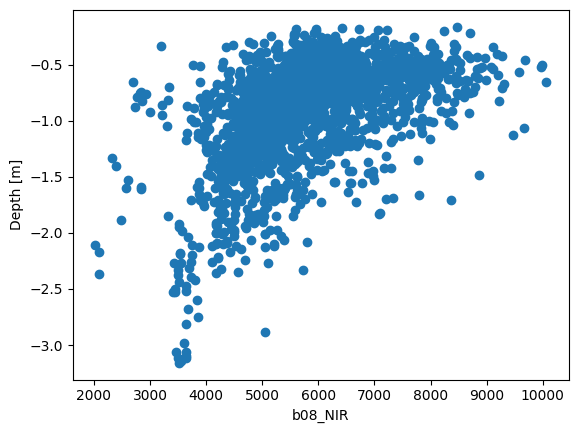

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2090    3.0
2091    3.0
2092    3.0
2093    3.0
2094    3.0
Name: Meltpond_index, Length: 2095, dtype: float64


In [388]:
columns = ["Meltpond_index","Latitude","Longtitude","b08_NIR","b04_red","b03_green","b02_blue","Depth[m]","Time_sentinel","Time_ICESat"]
#load data with columns
data = pd.read_csv(data_path, names=columns)
#data=pd.read_csv(data_path)
#print(data)
plt.plot(data["b03_green"],data["Depth[m]"],'o')
plt.xlabel("b08_NIR")
plt.ylabel("Depth [m]")
plt.show()
print(data["Meltpond_index"])

In [392]:
#print(data[data["Meltpond_index"] == 2.0])
M_index = 0.0
#data.loc[2, "Meltpond_index"] = 3
#print(data["Meltpond_index"])  
for i in range(len(data)-1):
    
    
    if data["Meltpond_index"][i] != data["Meltpond_index"][i+1]:
        M_index += 1
    data.loc[i, "Meltpond_index"] = M_index
    #print(M_index)
data.loc[2094, "Meltpond_index"] = M_index
#print(data["Meltpond_index"])
#print(data["Meltpond_index"].unique())

#print(data[data["Meltpond_index"] == 2.0])

    Meltpond_index   Latitude  Longtitude  b08_NIR  b04_red  b03_green  \
34             2.0  81.902532  -16.506773   1128.0   2340.0     4628.0   
35             2.0  81.902628  -16.507357   1121.0   2458.0     4836.0   
36             2.0  81.899101  -16.499986   3100.0   5284.0     6836.0   
37             2.0  81.899108  -16.500620   1834.0   4088.0     6360.0   
38             2.0  81.899197  -16.500571   1439.0   3282.0     5492.0   
39             2.0  81.899287  -16.500521   1352.0   2794.0     4888.0   
40             2.0  81.899376  -16.500472   1346.0   2642.0     4696.0   
41             2.0  81.899383  -16.501105   1291.0   2344.0     4532.0   
42             2.0  81.899472  -16.501056   1280.0   2434.0     4648.0   
43             2.0  81.899561  -16.501007   1324.0   2578.0     4628.0   
44             2.0  81.899568  -16.501640   1289.0   2462.0     4664.0   

    b02_blue  Depth[m]        Time_sentinel          Time_ICESat  
34    5432.0 -0.892769  2021-07-06 16:29:01 

In [390]:



#spilt each pixel up with thier two Nabours and the central hieght to make new model

#add coulums to data. Left neighbor and right niegbur ["b08 (NIR)","b02 (red)","b03 (green)","b04 (blue)"]
#mdata=data+Pixelvalues.shift(1)+Pixelvalues.shift(-1)

#Pixelvalue
Pixelvalues = data[["b08_NIR","b04_red","b03_green","b02_blue"]]

print(Pixelvalues.shape)



#Remove each meltpond id
#print(Meltponds_D[['b08_NIR_left_neighbor', 'b04_red_left_neighbor',
       #'b03_green_left_neighbor', 'b02_blue_left_neighbor']])

   

Meltponds_D=pd.DataFrame()
for meltpond_id in data["Meltpond_index"].unique():
    meltpond_data = data[data["Meltpond_index"] == meltpond_id]
    meltpond_pixelvalues = meltpond_data[["b08_NIR", "b04_red", "b03_green", "b02_blue"]]

    left_neighbor = meltpond_pixelvalues.shift(1)
    right_neighbor = meltpond_pixelvalues.shift(-1)

    left_neighbor.columns = [f"{col}_left_neighbor" for col in left_neighbor.columns]
    right_neighbor.columns = [f"{col}_right_neighbor" for col in right_neighbor.columns]

    meltpond_mdata = pd.concat([meltpond_data, left_neighbor, right_neighbor], axis=1)
    #append meltpond_data to Meltponds_D
    Meltponds_D = pd.concat([Meltponds_D, meltpond_mdata], axis=0)  # Concatenate along rows

print(Meltponds_D.shape)


(2095, 4)
(2095, 18)


In [391]:
#diskart kanterne. Ved at fjerne rækker hvor der er NAN værdier
Koloner=['b08_NIR', 'b04_red', 'b03_green', 'b02_blue','b08_NIR_left_neighbor', 'b04_red_left_neighbor',
       'b03_green_left_neighbor', 'b02_blue_left_neighbor','b08_NIR_right_neighbor', 'b04_red_right_neighbor',
       'b03_green_right_neighbor', 'b02_blue_right_neighbor']

Meltponds_D = Meltponds_D.dropna()
Meltponds_D = Meltponds_D.reset_index(drop=True)

#Nu linlær model med Meltponds_D

Koloner=['b08_NIR', 'b04_red', 'b03_green', 'b02_blue','b08_NIR_left_neighbor', 'b04_red_left_neighbor',
       'b03_green_left_neighbor', 'b02_blue_left_neighbor','b08_NIR_right_neighbor', 'b04_red_right_neighbor',
       'b03_green_right_neighbor', 'b02_blue_right_neighbor']


#Gem en csv fil med Meltponds_D
Meltponds_D.to_csv("C:/Users/chrel/Documents/GitHub/Fagprojekt_MeltpondsNY/Pixel_med_2naboer.csv")
Meltponds_D.shape


PermissionError: [Errno 13] Permission denied: 'C:/Users/chrel/Documents/GitHub/Fagprojekt_MeltpondsNY/Pixel_med_2naboer.csv'

In [ ]:
X=Meltponds_D[Koloner].to_numpy()

reg.fit(X, Meltponds_D["Depth [m]"])

model_depths = reg.predict(X)


fejl= model_depths-Meltponds_D["Depth [m]"]

fejlmean=sum(abs(fejl))/len(fejl)
print(fejlmean)

print(reg.coef_)

KeyError: 'Depth [m]'

In [393]:
print(data)

      Meltpond_index   Latitude  Longtitude  b08_NIR  b04_red  b03_green  \
0                0.0  82.281744  -17.039570   1436.0   2634.0     4784.0   
1                0.0  82.281833  -17.039524   1315.0   2134.0     4184.0   
2                0.0  82.281840  -17.040190   1219.0   2492.0     4860.0   
3                0.0  82.281929  -17.040144   1192.0   2116.0     4200.0   
4                0.0  82.282018  -17.040099   1311.0   1994.0     4032.0   
...              ...        ...         ...      ...      ...        ...   
2090           139.0  81.282483  -10.469555   1506.0   1916.0     2600.0   
2091           139.0  81.282480  -10.470145   3120.0   3790.0     4452.0   
2092           139.0  81.282570  -10.470160   2366.0   2952.0     3328.0   
2093           139.0  81.282659  -10.470175   1794.0   2244.0     2816.0   
2094           139.0  81.282749  -10.470190   2744.0   3714.0     4784.0   

      b02_blue  Depth[m]        Time_sentinel          Time_ICESat  
0       5732.0 -0.

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
X_train=X[0:200]
X_test=X[200:]
Y_train=Meltponds_D["Depth [m]"][0:200]
Y_test=Meltponds_D["Depth [m]"][200:]

scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply same transformation to test data
#Y_train=Y_train.to_numpy()
#Y_train_scaled = scaler.fit_transform(Y_train)
#Y_test=scaler.transform(Y_test)

print(X_test.shape)


(94, 12)


In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(4), random_state=3)

reg.fit(X_train_scaled, Y_train)

Model=reg.predict(X_test_scaled)
Fejl=sum(abs(Y_test-Model))/len(Y_test)
Fejl

c:\Users\chrel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.22906062712932374

In [ ]:
Model=reg.predict(X_train_scaled)
Fejl=sum(abs(Y_train-Model))/len(Y_train)
Fejl

0.08089361711464849

In [454]:
import os
import tifffile as tiff
meltpond_1 = data[data["Meltpond_index"] == 6]
path = os.path.join(os.getcwd(), "Detected_meltponds\\20210706162901_ChristianT\\depths\\7_T27XWM_20210706T162901_gt1ls.tiff")
img = tiff.imread(path)/(2**16)

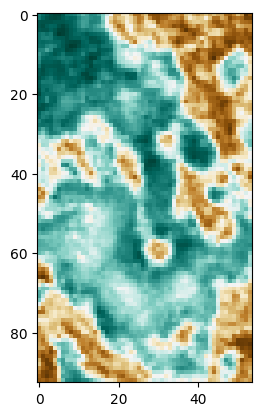

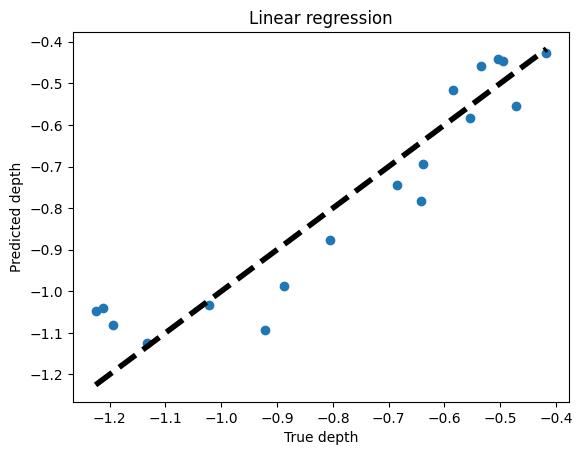

In [457]:
X = meltpond_1[['b08_NIR', 'b04_red','b03_green', 'b02_blue']].to_numpy()
y = meltpond_1['Depth[m]'].to_numpy()
#import linear model from sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
plt.plot(y, y_pred, 'o')
#plot line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('True depth')
plt.ylabel('Predicted depth')
plt.title('Linear regression')
plt.show()

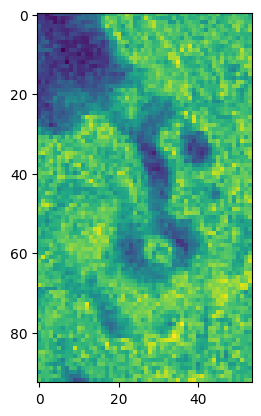

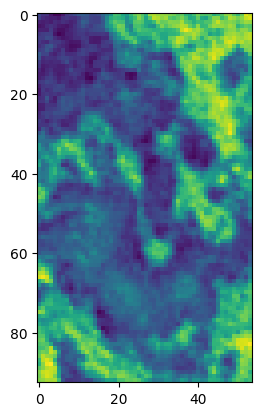

In [476]:
#PREDICT IMG DEPTH
M_d=reg.predict(img[:,:,:].reshape(-1, 4))
Heat=np.reshape(M_d,(img.shape[0],img.shape[1]))
Heat.shape
#create heatmap of Heat
plt.imshow(Heat)
plt.show()
#plot the image as rgb
plt.imshow(img[:,:,0],1::4)
plt.show()


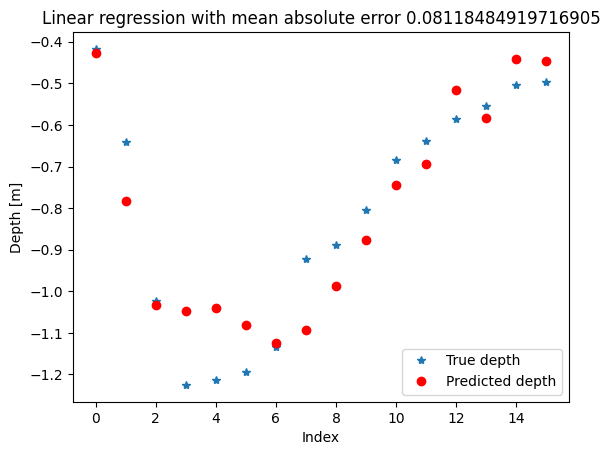

In [473]:
idx = np.arange(0, len(y[2:]))
plt.plot(idx, y[2:], '*')
plt.plot(idx, y_pred[2:], 'o', color='red')
plt.xlabel('Index')
plt.ylabel('Depth [m]')
plt.title('Linear regression with mean absolute error {}'.format(np.mean(np.abs(y - y_pred))))
plt.legend(['True depth', 'Predicted depth'])
plt.show()